<a href="https://colab.research.google.com/github/esracum/MachineLearning-Backpropagation/blob/main/12_12_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Datasetin** **Oluşturulması**, **Train Test Split**

In [7]:
import csv

def create_train_test_datasets(train_filename, test_filename):
    # Dataset headers
    headers = ["x1", "x2", "y"]

    # Split data into train (odd results) and test (even results)
    train_data = []
    test_data = []

    for x1 in range(1, 11):  # Numbers 1 to 10
        for x2 in range(1, 11):  # Numbers 1 to 10
            y = x1 * x2
            if y % 2 != 0:  # Odd result
                train_data.append([x1, x2, y])
            else:  # Even result
                test_data.append([x1, x2, y])

    # Write train dataset
    with open(train_filename, mode="w", newline="") as train_file:
        writer = csv.writer(train_file)
        writer.writerow(headers)  # Write the headers
        writer.writerows(train_data)  # Write the rows

    print(f"Train dataset saved to {train_filename}")

    # Write test dataset
    with open(test_filename, mode="w", newline="") as test_file:
        writer = csv.writer(test_file)
        writer.writerow(headers)  # Write the headers
        writer.writerows(test_data)  # Write the rows

    print(f"Test dataset saved to {test_filename}")

# Create train and test datasets
create_train_test_datasets("train.csv", "test.csv")


Train dataset saved to train.csv
Test dataset saved to test.csv


**Datasetin** **Normalizasyonu**

In [8]:


def normalize_and_save_train_test_datasets(train_filename, test_filename, normalized_train_filename, normalized_test_filename):
    # Normalize and save train dataset
    with open(train_filename, mode="r") as train_file:
        reader = csv.reader(train_file)
        headers = next(reader)  # Read headers
        train_data = list(reader)  # Read data

    normalized_train_data = []
    for row in train_data:
        x1, x2, y = map(float, row)
        x1_normalized = x1 / 10  # Normalize x1
        x2_normalized = x2 / 10  # Normalize x2
        y_normalized = y / 100  # Normalize y
        normalized_train_data.append([x1_normalized, x2_normalized, y_normalized])

    with open(normalized_train_filename, mode="w", newline="") as normalized_train_file:
        writer = csv.writer(normalized_train_file)
        writer.writerow(headers)  # Write headers
        writer.writerows(normalized_train_data)  # Write rows

    print(f"Normalized train dataset saved to {normalized_train_filename}")

    # Normalize and save test dataset
    with open(test_filename, mode="r") as test_file:
        reader = csv.reader(test_file)
        headers = next(reader)  # Read headers
        test_data = list(reader)  # Read data

    normalized_test_data = []
    for row in test_data:
        x1, x2, y = map(float, row)
        x1_normalized = x1 / 10  # Normalize x1
        x2_normalized = x2 / 10  # Normalize x2
        y_normalized = y / 100  # Normalize y
        normalized_test_data.append([x1_normalized, x2_normalized, y_normalized])

    with open(normalized_test_filename, mode="w", newline="") as normalized_test_file:
        writer = csv.writer(normalized_test_file)
        writer.writerow(headers)  # Write headers
        writer.writerows(normalized_test_data)  # Write rows

    print(f"Normalized test dataset saved to {normalized_test_filename}")

# Normalize and save train and test datasets
normalize_and_save_train_test_datasets("train.csv", "test.csv", "normalized_train.csv", "normalized_test.csv")

Normalized train dataset saved to normalized_train.csv
Normalized test dataset saved to normalized_test.csv


**Modelin** **Oluşturulması**

Epoch 0/500, Eğitim Cost: 0.0844, Doğrulama Cost: 0.1001
Epoch 100/500, Eğitim Cost: 0.0808, Doğrulama Cost: 0.0984
Epoch 200/500, Eğitim Cost: 0.0779, Doğrulama Cost: 0.0965
Epoch 300/500, Eğitim Cost: 0.0752, Doğrulama Cost: 0.0943
Epoch 400/500, Eğitim Cost: 0.0727, Doğrulama Cost: 0.0917
Epoch 0/500, Eğitim Cost: 0.1159, Doğrulama Cost: 0.0956
Epoch 100/500, Eğitim Cost: 0.0869, Doğrulama Cost: 0.0751
Epoch 200/500, Eğitim Cost: 0.0715, Doğrulama Cost: 0.0660
Epoch 300/500, Eğitim Cost: 0.0630, Doğrulama Cost: 0.0620
Epoch 400/500, Eğitim Cost: 0.0580, Doğrulama Cost: 0.0604
Epoch 0/500, Eğitim Cost: 0.0965, Doğrulama Cost: 0.1078
Epoch 100/500, Eğitim Cost: 0.0898, Doğrulama Cost: 0.1054
Epoch 200/500, Eğitim Cost: 0.0853, Doğrulama Cost: 0.1033
Epoch 300/500, Eğitim Cost: 0.0817, Doğrulama Cost: 0.1013
Epoch 400/500, Eğitim Cost: 0.0788, Doğrulama Cost: 0.0993
Epoch 0/1500, Eğitim Cost: 0.1089, Doğrulama Cost: 0.0912
Epoch 100/1500, Eğitim Cost: 0.0922, Doğrulama Cost: 0.0796
Epo

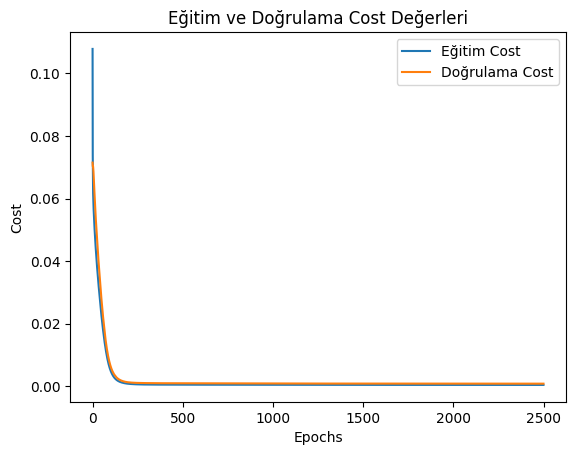

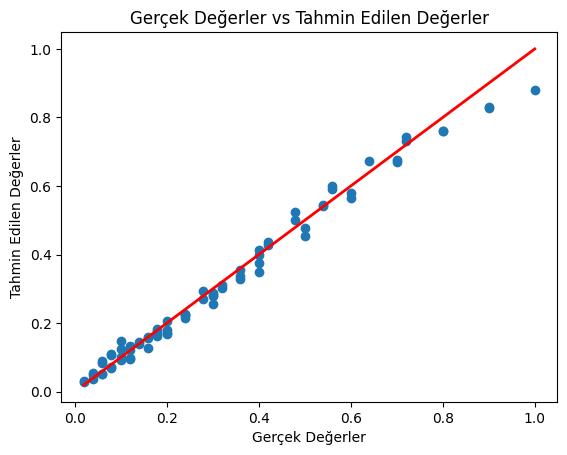

R² Skoru: 0.9862


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import r2_score

# Normalized CSV dosyalarını oku
train_df = pd.read_csv('normalized_train.csv')
test_df = pd.read_csv('normalized_test.csv')

# Giriş ve çıkış verilerini ayır (train seti için)
X_train = train_df[['x1', 'x2']].values
y_train = train_df['y'].values

# Giriş ve çıkış verilerini ayır (test seti için)
X_test = test_df[['x1', 'x2']].values
y_test = test_df['y'].values

class DeepNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes  # Gizli katmanların düğüm sayıları (liste)
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Ağırlıklar ve bias'ları başlat
        self.weights = []
        self.biases = []
        layer_input_size = input_size

        # Gizli katmanlar için ağırlıklar ve bias'lar
        for hidden_size in hidden_sizes:
            self.weights.append(np.random.randn(layer_input_size, hidden_size) * np.sqrt(2. / layer_input_size))
            self.biases.append(np.zeros((1, hidden_size)))
            layer_input_size = hidden_size

        # Çıkış katmanı için ağırlık ve bias
        self.weights.append(np.random.randn(layer_input_size, output_size) * np.sqrt(2. / layer_input_size))
        self.biases.append(np.zeros((1, output_size)))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.layer_inputs = []
        self.layer_outputs = []

        input_data = X
        #her bir nöronun "ağırlıklı toplamı" hesaplanır
        for i in range(len(self.hidden_sizes)):
            self.layer_inputs.append(np.dot(input_data, self.weights[i]) + self.biases[i])
            input_data = self.relu(self.layer_inputs[-1])
            self.layer_outputs.append(input_data)

        # Çıkış katmanı
        self.output_input = np.dot(input_data, self.weights[-1]) + self.biases[-1]
        self.predicted_output = self.sigmoid(self.output_input)

    def backward(self, X, y):
        output_error = y - self.predicted_output
        #Türevi, hatanın çıktıya göre duyarlılığını (gradyanı) hesaplamak için kullanılır.
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Geri yayılım: Çıkış katmanından gizli katmanlara
        deltas = [output_delta]
        for i in reversed(range(len(self.hidden_sizes))):
            hidden_error = deltas[-1].dot(self.weights[i + 1].T)
            hidden_delta = hidden_error * self.relu_derivative(self.layer_outputs[i])
            deltas.append(hidden_delta)

        deltas = deltas[::-1]

        # Ağırlık ve bias güncellemeleri
        for i in range(len(self.hidden_sizes) + 1):
            self.weights[i] += self.layer_outputs[i - 1].T.dot(deltas[i]) * self.learning_rate if i > 0 else X.T.dot(deltas[i]) * self.learning_rate
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.learning_rate

    def train(self, X_train, y_train, X_val, y_val, epochs):
        self.train_cost = []
        self.val_cost = []
        for epoch in range(epochs):
            self.forward(X_train)
            self.backward(X_train, y_train)

            # Eğitim kaybı (Mean Squared Error)
            train_cost = np.mean((y_train - self.predicted_output) ** 2)
            self.train_cost.append(train_cost)

            # Doğrulama kaybı
            self.forward(X_val)
            val_cost = np.mean((y_val - self.predicted_output) ** 2)
            self.val_cost.append(val_cost)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Eğitim Cost: {train_cost:.4f}, Doğrulama Cost: {val_cost:.4f}")

    def predict(self, X):
        self.forward(X)
        return self.predicted_output

# Hiperparametre arama fonksiyonu
def find_best_hyperparameters(X_train, y_train, X_val, y_val, learning_rates, epochs_values, hidden_sizes):
    best_cost = float('inf')
    best_hyperparameters = {}

    for learning_rate in learning_rates:
        for epochs in epochs_values:
            for hidden_size in hidden_sizes:
                model = DeepNeuralNetwork(input_size=2, hidden_sizes=[hidden_size], output_size=1, learning_rate=learning_rate)
                model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), epochs)

                # En iyi hiperparametreyi doğrulama kaybına göre seç
                val_cost = model.val_cost[-1]
                if val_cost < best_cost:
                    best_cost = val_cost
                    best_hyperparameters = {'learning_rate': learning_rate, 'epochs': epochs, 'hidden_size': hidden_size}

    return best_hyperparameters

# Hiperparametre arama için değerler
learning_rates = [0.001, 0.01, 0.1]
epochs_values = [500, 1500, 2500]
hidden_sizes = [2, 4, 8]

# Eğitim ve doğrulama setlerini belirle
X_val, y_val = X_test, y_test

# En iyi hiperparametreleri bul
best_hyperparameters = find_best_hyperparameters(X_train, y_train, X_val, y_val, learning_rates, epochs_values, hidden_sizes)

# En iyi hiperparametrelerle modeli tekrar eğit
best_model = DeepNeuralNetwork(input_size=2, hidden_sizes=[best_hyperparameters['hidden_size']],
                               output_size=1, learning_rate=best_hyperparameters['learning_rate'])
best_model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), best_hyperparameters['epochs'])

# Test setini değerlendir
predictions = best_model.predict(X_test)
test_cost = np.mean((predictions - y_test.reshape(-1, 1)) ** 2)
print(f'En İyi Modelin Test Cost\'u: {test_cost:.4f}')
print(f'En İyi Hiperparametreler: {best_hyperparameters}')

# Eğitim ve Doğrulama Kayıp Grafiği
plt.plot(best_model.train_cost, label='Eğitim Cost')
plt.plot(best_model.val_cost, label='Doğrulama Cost')
plt.title("Eğitim ve Doğrulama Cost Değerleri")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Gerçek Değerler vs Tahminler Grafiği
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # y = x doğrusu
plt.title("Gerçek Değerler vs Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.show()

# R² Skoru Modelin açıklayamadığı hata karelerinin toplamıdır.
r2 = r2_score(y_test, predictions)
print(f"R² Skoru: {r2:.4f}")

# Modeli kaydet
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


In [10]:
import numpy as np
import pickle

# Eğitilmiş modeli yükle
with open("best_model.pkl", "rb") as file:
    NN = pickle.load(file)

print("Eğitilmiş model başarıyla yüklendi!")

# Girişlerin minimum ve maksimum değerlerini belirle
X_min = np.array([1, 1])  # Her iki çarpan için minimum değer
X_max = np.array([10, 10])  # Her iki çarpan için maksimum değer

# Çıktının minimum ve maksimum değerleri
Y_min = 1  # Minimum çarpım (1x1)
Y_max = 100  # Maksimum çarpım (10x10)

# Kullanıcı girdisi
print("Girmek istediğiniz sayıları girin:")
a = float(input("Birinci sayıyı girin: "))
b = float(input("İkinci sayıyı girin: "))

# Kullanıcı girdilerini normalize et
Z = np.array([[a, b]])
Z_normalized = (Z - X_min) / (X_max - X_min)  # Normalize işlemi

# Modelden tahmin al
prediction_normalized = NN.predict(Z_normalized)
prediction = prediction_normalized * (Y_max - Y_min) + Y_min  # Çıkışı geri ölçeklendir

# Sonuçları yazdır
print(f"Gerçek değer: {a * b}")
print(f"Çarpım Tahmini: {prediction[0]}")


Eğitilmiş model başarıyla yüklendi!
Girmek istediğiniz sayıları girin:
Birinci sayıyı girin: 7
İkinci sayıyı girin: 8
Gerçek değer: 56.0
Çarpım Tahmini: [55.11150993]


In [6]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)
mae = np.mean(np.abs(predictions - y_test.reshape(-1, 1)))
print(f"Ortalama Mutlak Hata (MAE): {mae:.4f}")


Ortalama Mutlak Hata (MAE): 0.0175
